In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # to plot image, graph
import time

In [27]:
%matplotlib inline

In [28]:
# dataset for digit (0-9)
from sklearn.datasets import load_digits

In [29]:
# load dataset
digits = load_digits()

In [30]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [31]:
# already processed images
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [32]:
# predictors,independent variables, features
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [33]:
# target variable, class, dependent variable
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [34]:
# There 1797 images (8 by 8 for a dimension of 64)
print('Image Data Shape', digits.images.shape)

Image Data Shape (1797, 8, 8)


In [35]:
# 1797 labels
print('Label Data Shape', digits.target.shape)

Label Data Shape (1797,)


In [36]:
X = digits.images

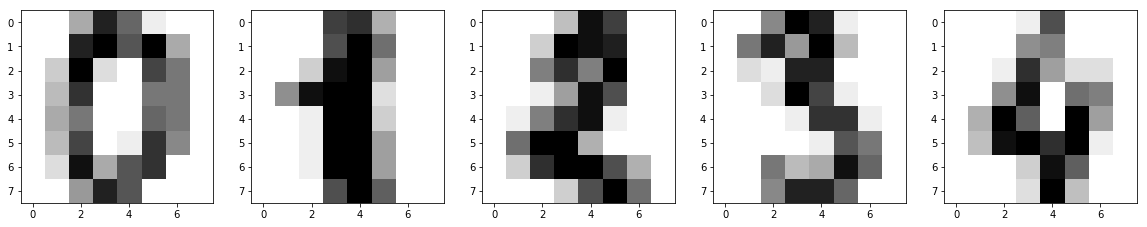

In [37]:
plt.figure(figsize=(20,10))
columns = 5
for i in range(5):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(X[i],cmap=plt.cm.gray_r,interpolation='nearest')

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix # metrics error
from sklearn.model_selection import train_test_split # resampling method

In [39]:
X = digits.data
y = digits.target

In [40]:
# since its a multi-class prediction, in order to prevent error we need some library
from sklearn.multiclass import OneVsRestClassifier

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = OneVsRestClassifier(KNeighborsClassifier())

In [44]:
knn.fit(X_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
          n_jobs=None)

In [45]:
# predict for one observation
knn.predict(X_test[0].reshape(1,-1))

array([2])

In [46]:
# predict for multiple observation (images) at once
knn.predict(X_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [47]:
# make prediction on entire test data
predictions = knn.predict(X_test)

In [48]:
%time
# 98%
print('KNN Accuracy: %.3f' % accuracy_score(y_test,predictions))

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 10.7 µs
KNN Accuracy: 0.980


In [49]:
# to create nice confusion metrics
import seaborn as sns

Text(0.5, 1.0, 'Accuracy Score: 0.98')

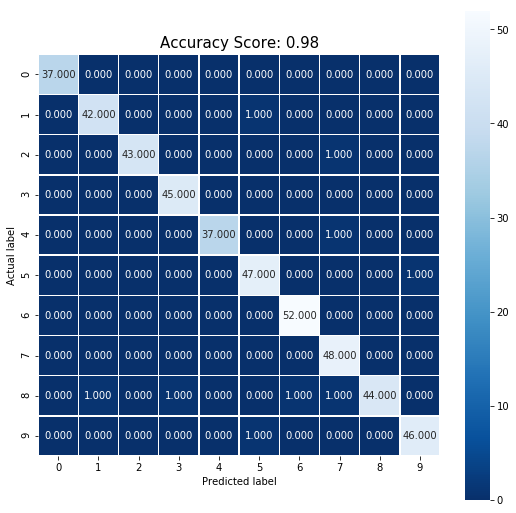

In [50]:
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predictions))
plt.title(all_sample_title,size=15)

# KNN accuracy is 98%